<a href="https://colab.research.google.com/github/nhamhung/CS3244-Machine-Learning/blob/main/TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import json 
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

df_train = pd.read_csv('/content/drive/My Drive/CS3244 Project/train_lemmatized.csv')
df_test = pd.read_csv('/content/drive/My Drive/CS3244 Project/test_lemmatized.csv')
df_test_labels = pd.read_csv('/content/drive/My Drive/CS3244 Project/test_labels.csv')

FileNotFoundError: ignored

# Preprocess data

In [ ]:
def lower(s):
  return s.lower()

In [ ]:
!pip install contractions
import contractions
sample_abbr = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}
for key in sample_abbr.keys():
  contractions.add(key, sample_abbr[key])

def contraction(s):
  return contractions.fix(s)

     |████████████████████████████████| 317kB 4.6MB/s 
     |████████████████████████████████| 245kB 8.5MB/s 
ERROR: Operation cancelled by user


ModuleNotFoundError: ignored

In [ ]:
APOSTROPHES = { 
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "sshe is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall"
}

def remove_apostrophe(s):
    words = s.split()
    reformed = [ APOSTROPHES[word] if word in APOSTROPHES else word for word in words ]
    reformed = " ".join(reformed)
    return reformed

In [ ]:
import re
def remove_URL(s):
    return re.sub(r"https?://\S+|www\.\S+", "", s)

In [ ]:
def remove_html(s):
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", s)

In [ ]:
def remove_non_ascii(s):
    return re.sub(r"[^\x00-\x7f]", r"", s) # not in range range of char code 0 to 127

In [ ]:
def remove_emoji(s):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', s)

In [ ]:
import string

def remove_punctuation(s):
    return s.translate(str.maketrans('', '', string.punctuation))

In [ ]:
def remove_number(s):
  result = ''.join([i for i in s if not i.isdigit()])
  return result

In [ ]:
preprocess('are u gay?68.33.41.181 http://abc google.com')

In [ ]:
preprocess('Same for File:SeanKilpatrick2014.jpg and File:ConnorBarwinCincy.png')

In [ ]:
def preprocess(comment):
  comment = lower(comment)
  comment = contraction(comment)
  comment = remove_apostrophe(comment)
  comment = remove_number(comment)
  comment = remove_URL(comment)
  comment = remove_html(comment)
  comment = remove_non_ascii(comment)
  comment = remove_emoji(comment)
  comment = remove_punctuation(comment)
  return lower(comment)

In [ ]:
df_train['clean_text'] = df_train['comment_text'].apply(lambda x: preprocess(x))

In [ ]:
df_train.head()

# Vectorize

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

df_train['tokenized'] = df_train['clean_text'].apply(word_tokenize)
df_train.head(10)

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
df_train['stopwords_removed'] = df_train['tokenized'].apply(lambda x: [word for word in x if word not in stop])
df_train.head()

In [ ]:
df_train['stopwords_removed'][2]

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('brown')

from nltk.corpus import wordnet
from nltk.corpus import brown

wordnet_map = {"N":wordnet.NOUN, 
               "V":wordnet.VERB, 
               "J":wordnet.ADJ, 
               "R":wordnet.ADV
              }
    
train_sents = brown.tagged_sents(categories='news')
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)

def pos_tag_wordnet(text, pos_tag_type="pos_tag"):
    """
        Create pos_tag with wordnet format
    """
    pos_tagged_text = t2.tag(text)
    
    # map the pos tagging output with wordnet output 
    pos_tagged_text = [(word, wordnet_map.get(pos_tag[0])) if pos_tag[0] in wordnet_map.keys() else (word, wordnet.NOUN) for (word, pos_tag) in pos_tagged_text ] # if tag is in wordnet_map then map also default noun
    return pos_tagged_text

df_train['combined_postag_wnet'] = df_train['stopwords_removed'].apply(lambda x: pos_tag_wordnet(x))
df_train.head()

In [ ]:
from nltk.stem import WordNetLemmatizer

def lemmatize_word(text):
    """
        Lemmatize the tokenized words
    """

    lemmatizer = WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word, tag) for word, tag in text]
    return lemma

df_train['lemmatize_word_w_pos'] = df_train['combined_postag_wnet'].apply(lambda x: lemmatize_word(x))
df_train['lemmatize_word_w_pos'] = df_train['lemmatize_word_w_pos'].apply(lambda x: [word for word in x if word not in stop]) # double check to remove stop words
df_train['lemmatize_text'] = [' '.join(map(str, l)) for l in df_train['lemmatize_word_w_pos']] # join back to text

df_train.head()

In [ ]:
df_test.head()

In [ ]:
df_train.to_csv("/content/drive/My Drive/CS3244 Project/train_lemmatized.csv")

In [ ]:
df_test.to_csv("/content/drive/My Drive/CS3244 Project/test_lemmatized.csv")

In [ ]:
df_test['clean_text'] = df_test['comment_text'].apply(lambda x:preprocess(x))

In [ ]:
df_test['tokenized'] = df_test['clean_text'].apply(word_tokenize)

In [ ]:
stop = set(stopwords.words('english'))
df_test['stopwords_removed'] = df_test['tokenized'].apply(lambda x: [word for word in x if word not in stop])

In [ ]:
df_test['combined_postag_wnet'] = df_test['stopwords_removed'].apply(lambda x: pos_tag_wordnet(x))

In [ ]:
df_test['lemmatize_word_w_pos'] = df_test['combined_postag_wnet'].apply(lambda x: lemmatize_word(x))
df_test['lemmatize_word_w_pos'] = df_test['lemmatize_word_w_pos'].apply(lambda x: [word for word in x if word not in stop]) # double check to remove stop words
df_test['lemmatize_text'] = [' '.join(map(str, l)) for l in df_test['lemmatize_word_w_pos']] # join back to text

# Model Building

In [ ]:
# Import packages for pre-processing
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# Import ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df_train = df_train.fillna("")
df_test = df_test.fillna("")

In [ ]:
data_tox = df_train.loc[:, ['id', 'lemmatize_text', 'toxic']]
data_sev = df_train.loc[:, ['id', 'lemmatize_text', 'severe_toxic']]
data_obs = df_train.loc[:, ['id', 'lemmatize_text', 'obscene']]
data_thr = df_train.loc[:, ['id', 'lemmatize_text', 'threat']]
data_ins = df_train.loc[:, ['id', 'lemmatize_text', 'insult']]
data_ide = df_train.loc[:, ['id', 'lemmatize_text', 'identity_hate']]

In [ ]:
'''
df_done: data_tox_done, data_sev_done, ...
label: toxic, severe_toxic, ...
vectorizer values: CountVectorizer, TfidfVectorizer
gram_range values: (1,1) for unigram, (2,2) for bigram
'''

def cv_tf_train_test(df_type,label,vectorizer,ngram):

    ''' Train/Test split'''
    # Split the data into X and y data sets
    X = df_type.lemmatize_text
    y = df_type[label]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    ''' Count Vectorizer/TF-IDF '''

    # Create a Vectorizer object and remove stopwords from the table
    cv1 = vectorizer(ngram_range=(ngram), max_features=5000, strip_accents='unicode', analyzer='word', norm='l2')
    
    X_train_cv1 = cv1.fit_transform(X_train) # Learn the vocabulary dictionary and return term-document matrix
    X_test_cv1  = cv1.transform(X_test)      # Learn a vocabulary dictionary of all tokens in the raw documents.
    
    # Output a Dataframe of the CountVectorizer with unique words as the labels
    # test = pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names())
        
    ''' Initialize all model objects and fit the models on the training data '''
    lr = LogisticRegression(max_iter=300)
    lr.fit(X_train_cv1, y_train)
    print('lr done')

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)
    print('knn done')

    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)
    print('bnb done')
    
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)
    print('mnb done')
    
    # svm_model = LinearSVC()
    # svm_model.fit(X_train_cv1, y_train)
    # print('svm done')

    randomforest = RandomForestClassifier(n_estimators=50, random_state=42)
    randomforest.fit(X_train_cv1, y_train)
    print('rdf done')

    print(len(y_test))
    print(roc_auc_score(y_test, lr.predict_proba(X_test_cv1)[:,1]))    
    # Create a list of F1 score of all models 
    f1_score_data = {'Roc Auc Score':[roc_auc_score(y_test, lr.predict_proba(X_test_cv1)[:,1]), roc_auc_score(y_test, knn.predict_proba(X_test_cv1)[:,1]),
                                      roc_auc_score(y_test, bnb.predict_proba(X_test_cv1)[:,1]), roc_auc_score(y_test, mnb.predict_proba(X_test_cv1)[:,1]),
                                      roc_auc_score(y_test, svm_model.predict_proba(X_test_cv1)[:,1]), roc_auc_score(y_test, randomforest.predict_proba(X_test_cv1)[:,1])]} 
                          
    # Create DataFrame with the model names as column labels
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', '', 'RandomForest'])  

In [ ]:
'''
def cv_tf_train_test(df_done,label,vectorizer,ngram)
vectorizer values: CountVectorizer, TfidfVectorizer
ngram_range values: (1,1) for unigram, (2,2) for bigram
'''

import time

t0 = time.time()

df_ide_cv = cv_tf_train_test(data_ide, 'identity_hate', TfidfVectorizer, (1,2))
df_ide_cv.rename(columns={'F1 Score': 'F1 Score(identity_hate)', 'Roc Auc Score': 'Roc Auc Score(identity_hate)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_ide_cv

lr done
knn done
bnb done
mnb done
svm done
rdf done
Time taken: 289.2395284175873 seconds


,F1 Score(identity_hate)
Log Regression,0.287648
KNN,0.204668
BernoulliNB,0.117614
MultinomialNB,0.165441
SVM,0.353303
Random Forest,0.209765


In [ ]:
f1_all = pd.concat([df_tox_cv, df_sev_cv, df_obs_cv, df_ins_cv, df_thr_cv, df_ide_cv], axis=1)
f1_all

,F1 Score(toxic),F1 Score(severe_toxic),F1 Score(obscene),F1 Score(insult),F1 Score(threat),F1 Score(identity_hate)
Log Regression,0.723269,0.344828,0.734251,0.639721,0.176796,0.287648
KNN,0.445968,0.243386,0.486952,0.428456,0.176166,0.204668
BernoulliNB,0.341392,0.111934,0.245026,0.229751,0.177340,0.117614
MultinomialNB,0.653518,0.242236,0.665026,0.581361,0.000000,0.165441
SVM,0.747109,0.320323,0.761069,0.653589,0.309179,0.353303
Random Forest,0.729846,0.120325,0.776119,0.644310,0.080460,0.209765


# Sk-multilearn

In [ ]:
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 2.6MB/s 


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix, roc_auc_score

labels = ['toxic', 'severe_toxic', 'obscene', 'insult', 'threat', 'identity_hate']

# train and test set
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train[labels], test_size=0.3, random_state=42)

# Vectorize X_train, X_test
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,1), norm='l2', max_features=5000)

X_train_vectorized = vectorizer.fit_transform(X_train['lemmatize_text']) # note that X_train is converted into a "sparse matrix"
X_test_vectorized = vectorizer.transform(X_test['lemmatize_text']) # note that for new comments, we also need to transform them into sparse matrix before prediction

# initialize LabelPowerset multi-label classifier with a RandomForest
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)), # 'clf' is just the name of the OneVsRestClassifier
            ])

# train
for label in labels:
  print('**Processing {} comments...**'.format(label))
  LogReg_pipeline.fit(X_train_vectorized, y_train[label])
  prediction = LogReg_pipeline.predict(X_test_vectorized)

  print('Test accuracy is {}'.format(accuracy_score(y_test[label], prediction)))
  print('F1 score is {}'.format(f1_score(y_test[label], prediction)))
  print('Confusion matrix: \n', confusion_matrix(y_test[label], prediction))
  print('roc_auc_score: \n', roc_auc_score(y_test[label], prediction))
  print("\n")


**Processing toxic comments...**
Test accuracy is 0.955276570855615
F1 score is 0.7153304081904003
Confusion matrix: 
 [[43041   249]
 [ 1892  2690]]
roc_auc_score: 
 0.7906639860153609


**Processing severe_toxic comments...**
Test accuracy is 0.9904954879679144
F1 score is 0.341534008683068
Confusion matrix: 
 [[47299    87]
 [  368   118]]
roc_auc_score: 
 0.6204811842986737


**Processing obscene comments...**
Test accuracy is 0.9756433823529411
F1 score is 0.7247403210576016
Confusion matrix: 
 [[45171   145]
 [ 1021  1535]]
roc_auc_score: 
 0.7986739889913722


**Processing insult comments...**
Test accuracy is 0.9688335561497327
F1 score is 0.6071616640337019
Confusion matrix: 
 [[45227   256]
 [ 1236  1153]]
roc_auc_score: 
 0.7385001191849132


**Processing threat comments...**
Test accuracy is 0.9973888703208557
F1 score is 0.2038216560509554
Confusion matrix: 
 [[47731     5]
 [  120    16]]
roc_auc_score: 
 0.558771158035864


**Processing identity_hate comments...**
Test a

In [ ]:
X_train_vectorized

<111699x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 2760464 stored elements in Compressed Sparse Row format>

In [ ]:
X_train[X_train['severe_toxic'] == 1]['lemmatize_text'].iloc[3]

'need verifiable source statement check user page fat miserable balding fuck'

In [ ]:
X_test[X_test['severe_toxic'] == 1]['lemmatize_text'].iloc[1]

'motherfucking assholesuck dickyou dirty son whore'

In [ ]:
test_sentences = ['stupid shit', 'suck dikkkkk suck dikkkkk gogo gogo give blowjob demand', 'motherfucking assholesuck dickyou dirty son whore', 'becasue asshole cunt fucking asshole whimsical reverts legitimate addition biased nature go fuck pathetic existence']
test_sentences = pd.Series(test_sentences)
test = vectorizer.transform(test_sentences)  # convert sentence into sparse matrix

# visualize the sparse matrix
import scipy.sparse
pd.DataFrame.sparse.from_spmatrix(test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49960,49961,49962,49963,49964,49965,49966,49967,49968,49969,49970,49971,49972,49973,49974,49975,49976,49977,49978,49979,49980,49981,49982,49983,49984,49985,49986,49987,49988,49989,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
LogReg_pipeline.fit(X_train_vectorized, y_train['toxic']) # logreg fit on y_train['toxic']
LogReg_pipeline.predict(test)

array([1, 1, 1, 1])

In [ ]:
LogReg_pipeline.fit(X_train_vectorized, y_train['threat']) # logreg fit on y_train['toxic']
LogReg_pipeline.predict(test)

array([0, 0, 0, 0])

In [ ]:
LogReg_pipeline.fit(X_train_vectorized, y_train['severe_toxic']) # logreg fit on y_train['severe_toxic']
LogReg_pipeline.predict(test)

array([0, 0, 0, 1])

In [ ]:
train_data_randomized = train_data.loc[np.random.choice(train_data.index, size=10000)]
train_data_randomized

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_text,tokenized,stopwords_removed,combined_postag_wnet,lemmatize_word_w_pos,lemmatize_text
55053,931f2f3f650f11a9,Your work will be deleted or bastardized wheth...,1,0,0,0,0,0,your work will be deleted or bastardized wheth...,"[your, work, will, be, deleted, or, bastardize...","[work, deleted, bastardized, whether, adheres,...","[(work, n), (deleted, n), (bastardized, n), (w...","[work, deleted, bastardized, whether, adheres,...",work deleted bastardized whether adheres curre...
138398,e46f37bdecf445f9,Are you a deaf idiot? He BROKE the bird's neck...,1,0,0,0,1,0,are you a deaf idiot he broke the birds neck t...,"[are, you, a, deaf, idiot, he, broke, the, bir...","[deaf, idiot, broke, birds, neck, sound, clear...","[(deaf, a), (idiot, n), (broke, v), (birds, n)...","[deaf, idiot, break, bird, neck, sound, clearl...",deaf idiot break bird neck sound clearly show ...
12107,200bce8d97ac29e1,"Well, again you are deleting my part (sourced)...",0,0,0,0,0,0,well again you are deleting my part sourced yo...,"[well, again, you, are, deleting, my, part, so...","[well, deleting, part, sourced, also, forgot, ...","[(well, r), (deleting, n), (part, n), (sourced...","[well, deleting, part, sourced, also, forgot, ...",well deleting part sourced also forgot put int...
2839,07a72f0b59459a3f,Yea. I was sort of the local shit disturber in...,1,0,0,0,0,0,yea i was sort of the local shit disturber in ...,"[yea, i, was, sort, of, the, local, shit, dist...","[yea, sort, local, shit, disturber, young, adu...","[(yea, n), (sort, n), (local, n), (shit, n), (...","[yea, sort, local, shit, disturber, young, adu...",yea sort local shit disturber young adult life...
14872,274f5a6fde5aaa56,"Yes, thats right, use your admin power to disp...",0,0,0,0,0,0,yes that is right use your admin power to disp...,"[yes, that, is, right, use, your, admin, power...","[yes, right, use, admin, power, dispose, real,...","[(yes, n), (right, n), (use, v), (admin, n), (...","[yes, right, use, admin, power, dispose, real,...",yes right use admin power dispose real threat ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63341,a97b17c1944abad6,"Do me a favor...\n\nDrop dead, and don't accus...",1,0,0,0,0,0,do me a drop dead and do not accuse people of...,"[do, me, a, drop, dead, and, do, not, accuse, ...","[drop, dead, accuse, people, fabricating, thin...","[(drop, n), (dead, a), (accuse, v), (people, n...","[drop, dead, accuse, people, fabricating, thin...",drop dead accuse people fabricating thing okay
11842,1f572f3585453038,Applicability to Wikipedia \n\nTo what degree ...,0,0,0,0,0,0,applicability to wikipedia to what degree if a...,"[applicability, to, wikipedia, to, what, degre...","[applicability, wikipedia, degree, apply, wiki...","[(applicability, n), (wikipedia, n), (degree, ...","[applicability, wikipedia, degree, apply, wiki...",applicability wikipedia degree apply wikipedia...
159312,fbf20e312cd4a78d,"Walter Mercado \n\nAntonio, quite frankly, you...",1,1,1,0,1,0,walter mercado antonio quite frankly you are a...,"[walter, mercado, antonio, quite, frankly, you...","[walter, mercado, antonio, quite, frankly, fuc...","[(walter, n), (mercado, n), (antonio, n), (qui...","[walter, mercado, antonio, quite, frankly, fuc...",walter mercado antonio quite frankly fucker co...
11096,1d51e5c20edfe817,You're not the only one who's surprised that s...,0,0,0,0,0,0,you are not the only one who is surprised that...,"[you, are, not, the, only, one, who, is, surpr...","[one, surprised, someone, died, death]","[(one, n), (surprised, v), (someone, n), (died...","[one, surprise, someone, die, death]",one surprise someone die death


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

labels = ['toxic', 'severe_toxic', 'obscene', 'insult', 'threat', 'identity_hate']

# train and test set
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train[labels], test_size=0.3, random_state=42)

# Vectorize X_train, X_test
vectorizer = TfidfVectorizer(max_features=30000, strip_accents='unicode', analyzer='word', ngram_range=(1,1), norm='l2', stop_words='english')

X_train_vectorized = vectorizer.fit_transform(X_train['lemmatize_text']) # note that X_train is converted into a "sparse matrix"
X_test_vectorized = vectorizer.transform(X_test['lemmatize_text']) # note that for new comments, we also need to transform them into sparse matrix before prediction


In [ ]:
X_train_vectorized

<111699x30000 sparse matrix of type '<class 'numpy.float64'>'
	with 2331300 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb2bdc5d68>,
                    color=None,
                    features=['aa', 'aaa', 'aah', 'aaliyah', 'aap', 'aaps',
                              'aardvark', 'aaron', 'aau', 'aave', 'ab', 'aba',
                              'abad', 'abandon', 'abandoning', 'abandonment',
                              'abb', 'abbas', 'abbey', 'abbott', 'abbreviate',
                              'abbreviated', 'abbreviation', 'abby', 'abc',
                              'abcde', 'abd', 'abdication', 'abds', 'abducted', ...],
                    n=None, orient='v')

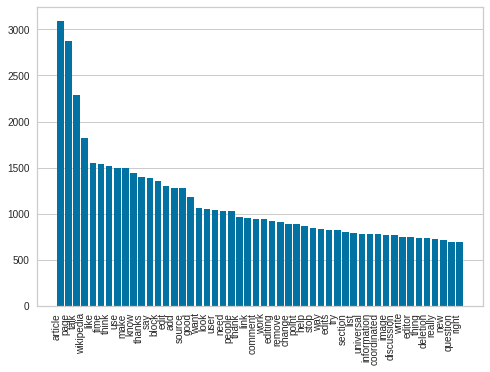

In [ ]:
from yellowbrick.text import FreqDistVisualizer
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(X_train_vectorized)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss

ModelsPerformance = {}

def metricsReport(modelName, test_labels, predictions):
    accuracy = accuracy_score(test_labels, predictions)

    macro_precision = precision_score(test_labels, predictions, average='macro')
    macro_recall = recall_score(test_labels, predictions, average='macro')
    macro_f1 = f1_score(test_labels, predictions, average='macro')

    micro_precision = precision_score(test_labels, predictions, average='micro')
    micro_recall = recall_score(test_labels, predictions, average='micro')
    micro_f1 = f1_score(test_labels, predictions, average='micro')
    hamLoss = hamming_loss(test_labels, predictions)
    print("------" + modelName + " Model Metrics-----")
    print("Accuracy: {:.4f}\nHamming Loss: {:.4f}\nPrecision:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nRecall:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nF1-measure:\n  - Macro: {:.4f}\n  - Micro: {:.4f}"\
          .format(accuracy, hamLoss, macro_precision, micro_precision, macro_recall, micro_recall, macro_f1, micro_f1))
    ModelsPerformance[modelName] = micro_f1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

knnClf = KNeighborsClassifier()

knnClf.fit(X_train_vectorized, y_train)
knnPredictions = knnClf.predict(X_test_vectorized)
metricsReport("knn", y_test, knnPredictions)

------knn Model Metrics-----
Accuracy: 0.8999
Hamming Loss: 0.0313
Precision:
  - Macro: 0.6823
  - Micro: 0.7661
Recall:
  - Macro: 0.1571
  - Micro: 0.2155
F1-measure:
  - Macro: 0.2503
  - Micro: 0.3364


In [ ]:
X_train_vectorized

<111699x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 2376567 stored elements in Compressed Sparse Row format>

## Dimensionality reduction?

In [ ]:
knnClf.predict(X_test_vectorized)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(X_train_vectorized, y_train)
dtPreds = dtClassifier.predict(X_test_vectorized)
metricsReport("Decision Tree", y_test, dtPreds)

------Decision Tree Model Metrics-----
Accuracy: 0.8965
Hamming Loss: 0.0254
Precision:
  - Macro: 0.5264
  - Micro: 0.6717
Recall:
  - Macro: 0.4353
  - Micro: 0.6057
F1-measure:
  - Macro: 0.4726
  - Micro: 0.6370


In [ ]:
dtClassifier.predict_proba(X_test_vectorized)

[array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]), array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]), array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]), array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]), array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]), array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]])]

In [ ]:
X_test[['comment_text', 'lemmatize_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

,comment_text,lemmatize_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
119105,"Geez, are you forgetful! We've already discus...",geez forgetful already discuss marx anarchist ...,0,0,0,0,0,0
131631,Carioca RFA \n\nThanks for your support on my ...,carioca rfa thanks support request adminship f...,0,0,0,0,0,0
125326,"""\n\n Birthday \n\nNo worries, It's what I do ...",birthday worry enjoy ur daytalke,0,0,0,0,0,0
111256,Pseudoscience category? \n\nI'm assuming that ...,pseudoscience category assuming article pseudo...,0,0,0,0,0,0
83590,"(and if such phrase exists, it would be provid...",phrase exists would provide search engine even...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
61999,"""\n\n His documented emotional involvements wi...",documented emotional involvement boy exclusion...,0,0,0,0,0,0
116777,Rename\n\nI don't know if it has been done or ...,rename know propose past article may renamed t...,0,0,0,0,0,0
134143,Just random nazi soldiers?,random nazi soldier,0,0,0,0,0,0
81360,add comments below this line>,add comment line,0,0,0,0,0,0


In [ ]:
test = ['arrogant administrator homosexual bastard fuck	']
test = vectorizer.transform(test)
dtClassifier.predict(test)

array([[1, 0, 1, 1, 0, 0]])

In [ ]:
# X_train_vectorized

In [ ]:
from sklearn.svm import LinearSVC

svmClassifier = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svmClassifier.fit(X_train_vectorized, y_train)

svmPreds = svmClassifier.predict(X_test_vectorized)
metricsReport("SVC Sq. Hinge Loss", y_test, svmPreds)

------SVC Sq. Hinge Loss Model Metrics-----
Accuracy: 0.9173
Hamming Loss: 0.0191
Precision:
  - Macro: 0.7133
  - Micro: 0.8323
Recall:
  - Macro: 0.4348
  - Micro: 0.6047
F1-measure:
  - Macro: 0.5284
  - Micro: 0.7005


In [ ]:
test = ['arrogant administrator homosexual bastard fuck	']

test = vectorizer.transform(test)
svmClassifier.predict(test)

array([[1, 0, 1, 1, 0, 1]])

In [ ]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.svm import LinearSVC


powerSetSVC = LabelPowerset(LinearSVC())
powerSetSVC.fit(X_train_vectorized, y_train)

powerSetSVCPreds = powerSetSVC.predict(X_test_vectorized)
metricsReport("Power Set SVC", y_test, powerSetSVCPreds)

In [ ]:
accuracy_score(y_test, pd.DataFrame.sparse.from_spmatrix(powerSetSVCPreds))

0.6311248073959939

In [ ]:
powerSetSVCPreds.toarray()

array([[1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [ ]:
test = ['arrogant administrator homosexual bastard fuck	']

test = vectorizer.transform(test)
powerSetSVC.predict(test).toarray()

array([[1, 0, 1, 1, 0, 0]])

In [ ]:
%%time

# using binary relevance
from sklearn.multioutput import ClassifierChain
from sklearn.linear_model import LogisticRegression


CPU times: user 1.2 ms, sys: 6.02 ms, total: 7.21 ms
Wall time: 2.79 ms


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train[labels], test_size=0.3, random_state=42)

# Vectorize X_train, X_test
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,2), norm='l2', max_features=50000)

X_train_vectorized = vectorizer.fit_transform(X_train['lemmatize_text']) # note that X_train is converted into a "sparse matrix"
X_test_vectorized = vectorizer.transform(X_test['lemmatize_text']) # note that for new comments, we also need to transform them into sparse matrix before prediction


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

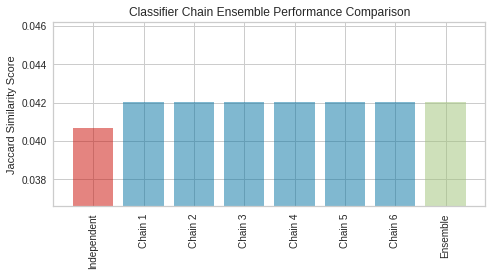

In [ ]:
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression

base_lr = LogisticRegression()

ovr = OneVsRestClassifier(base_lr)
ovr.fit(X_train_vectorized, y_train)
Y_pred_ovr = ovr.predict(X_test_vectorized)
ovr_jaccard_score = jaccard_score(y_test, Y_pred_ovr, average='samples')


chains = [ClassifierChain(base_lr, random_state=i)
          for i in range(6)]
for chain in chains:
    chain.fit(X_train_vectorized, y_train)

Y_pred_chains = np.array([chain.predict(X_test_vectorized) for chain in
                          chains])

chain_jaccard_scores = [jaccard_score(y_test, Y_pred_chain >= .5,
                                      average='samples')
                        for Y_pred_chain in Y_pred_chains]

Y_pred_ensemble = Y_pred_chains.mean(axis=0)
ensemble_jaccard_score = jaccard_score(y_test,
                                       Y_pred_ensemble >= .5,
                                       average='samples')

model_scores = [ovr_jaccard_score] + chain_jaccard_scores
model_scores.append(ensemble_jaccard_score)

model_names = ('Independent',
               'Chain 1',
               'Chain 2',
               'Chain 3',
               'Chain 4',
               'Chain 5',
               'Chain 6',
               'Ensemble')

x_pos = np.arange(len(model_names))

fig, ax = plt.subplots(figsize=(7, 4))
ax.grid(True)
ax.set_title('Classifier Chain Ensemble Performance Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation='vertical')
ax.set_ylabel('Jaccard Similarity Score')
ax.set_ylim([min(model_scores) * .9, max(model_scores) * 1.1])
colors = ['r'] + ['b'] * len(chain_jaccard_scores) + ['g']
ax.bar(x_pos, model_scores, alpha=0.5, color=colors)
plt.tight_layout()
plt.show()

In [ ]:
X_test

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_text,tokenized,stopwords_removed,combined_postag_wnet,lemmatize_word_w_pos,lemmatize_text
119105,7ca72b5b9c688e9e,"Geez, are you forgetful! We've already discus...",0,0,0,0,0,0,geez are you forgetful we have already discuss...,"[geez, are, you, forgetful, we, have, already,...","[geez, forgetful, already, discussed, marx, an...","[(geez, n), (forgetful, n), (already, r), (dis...","[geez, forgetful, already, discuss, marx, anar...",geez forgetful already discuss marx anarchist ...
131631,c03f72fd8f8bf54f,Carioca RFA \n\nThanks for your support on my ...,0,0,0,0,0,0,carioca rfa thanks for your support on my requ...,"[carioca, rfa, thanks, for, your, support, on,...","[carioca, rfa, thanks, support, request, admin...","[(carioca, n), (rfa, n), (thanks, n), (support...","[carioca, rfa, thanks, support, request, admin...",carioca rfa thanks support request adminship f...
125326,9e5b8e8fc1ff2e84,"""\n\n Birthday \n\nNo worries, It's what I do ...",0,0,0,0,0,0,birthday no worries it is what i do enjoy ur ...,"[birthday, no, worries, it, is, what, i, do, e...","[birthday, worries, enjoy, ur, daytalke]","[(birthday, n), (worries, n), (enjoy, v), (ur,...","[birthday, worry, enjoy, ur, daytalke]",birthday worry enjoy ur daytalke
111256,5332799e706665a6,Pseudoscience category? \n\nI'm assuming that ...,0,0,0,0,0,0,pseudoscience category i am assuming that this...,"[pseudoscience, category, i, am, assuming, tha...","[pseudoscience, category, assuming, article, p...","[(pseudoscience, n), (category, n), (assuming,...","[pseudoscience, category, assuming, article, p...",pseudoscience category assuming article pseudo...
83590,dfa7d8f0b4366680,"(and if such phrase exists, it would be provid...",0,0,0,0,0,0,and if such phrase exists it would be provided...,"[and, if, such, phrase, exists, it, would, be,...","[phrase, exists, would, provided, search, engi...","[(phrase, n), (exists, n), (would, n), (provid...","[phrase, exists, would, provide, search, engin...",phrase exists would provide search engine even...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61999,a5e8811002c2e965,"""\n\n His documented emotional involvements wi...",0,0,0,0,0,0,his documented emotional involvements with bo...,"[his, documented, emotional, involvements, wit...","[documented, emotional, involvements, boys, ex...","[(documented, n), (emotional, n), (involvement...","[documented, emotional, involvement, boy, excl...",documented emotional involvement boy exclusion...
116777,703c79bd1ef1f61d,Rename\n\nI don't know if it has been done or ...,0,0,0,0,0,0,rename i do not know if it has been done or pr...,"[rename, i, do, not, know, if, it, has, been, ...","[rename, know, done, proposed, past, article, ...","[(rename, n), (know, v), (done, v), (proposed,...","[rename, know, propose, past, article, may, re...",rename know propose past article may renamed t...
134143,cd618fa54e2da21d,Just random nazi soldiers?,0,0,0,0,0,0,just random nazi soldiers,"[just, random, nazi, soldiers]","[random, nazi, soldiers]","[(random, n), (nazi, n), (soldiers, n)]","[random, nazi, soldier]",random nazi soldier
81360,d99ec9d910520101,add comments below this line>,0,0,0,0,0,0,add comments below this line,"[add, comments, below, this, line]","[add, comments, line]","[(add, v), (comments, n), (line, n)]","[add, comment, line]",add comment line


In [ ]:
Y_pred_ensemble

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
Y_pred_chains

array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        ...,
        [

In [ ]:
Y_pred_ovr

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
accuracy_score(y_test, Y_pred_ovr)

0.9172585227272727

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test, Y_pred_ovr, average='weighted')

0.6420400942359448

In [ ]:
Y_pred_ensemble

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
accuracy_score(y_test, Y_pred_ensemble >= .5)

0.9193683155080213

In [ ]:
f1_score(y_test, Y_pred_ensemble >= 0.5, average='weighted')

0.6616911579886408

In [ ]:
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(X_train_vectorized, y_train)

# predict
predictions = classifier.predict(X_test_vectorized)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy =  0.9193683155080213




In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, multilabel_confusion_matrix

multilabel_confusion_matrix(y_test, predictions)

array([[[43080,   210],
        [ 1966,  2616]],

       [[47332,    54],
        [  416,    70]],

       [[45118,   198],
        [  889,  1667]],

       [[45018,   465],
        [  995,  1394]],

       [[47731,     5],
        [  118,    18]],

       [[47427,    13],
        [  355,    77]]])

In [ ]:
predictions

In [ ]:
df_train

# Train on the entire dataset

In [ ]:
df_train

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_text,tokenized,stopwords_removed,combined_postag_wnet,lemmatize_word_w_pos,lemmatize_text
0,0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why the edits made under my userna...,"['explanation', 'why', 'the', 'edits', 'made',...","['explanation', 'edits', 'made', 'username', '...","[('explanation', 'n'), ('edits', 'n'), ('made'...","['explanation', 'edits', 'make', 'username', '...",explanation edits make username hardcore metal...
1,1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww he matches this background colour i am se...,"['daww', 'he', 'matches', 'this', 'background'...","['daww', 'matches', 'background', 'colour', 's...","[('daww', 'n'), ('matches', 'n'), ('background...","['daww', 'match', 'background', 'colour', 'see...",daww match background colour seemingly stick t...
2,2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i am really not trying to edit war it ...,"['hey', 'man', 'i', 'am', 'really', 'not', 'tr...","['hey', 'man', 'really', 'trying', 'edit', 'wa...","[('hey', 'n'), ('man', 'n'), ('really', 'r'), ...","['hey', 'man', 'really', 'try', 'edit', 'war',...",hey man really try edit war guy constantly rem...
3,3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i can not make any real suggestions on i...,"['more', 'i', 'can', 'not', 'make', 'any', 're...","['make', 'real', 'suggestions', 'improvement',...","[('make', 'v'), ('real', 'a'), ('suggestions',...","['make', 'real', 'suggestion', 'improvement', ...",make real suggestion improvement wondered sect...
4,4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...,"['you', 'sir', 'are', 'my', 'hero', 'any', 'ch...","['sir', 'hero', 'chance', 'remember', 'page']","[('sir', 'n'), ('hero', 'n'), ('chance', 'n'),...","['sir', 'hero', 'chance', 'remember', 'page']",sir hero chance remember page
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159566,159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,and for the second time of asking when your vi...,"['and', 'for', 'the', 'second', 'time', 'of', ...","['second', 'time', 'asking', 'view', 'complete...","[('second', 'n'), ('time', 'n'), ('asking', 'v...","['second', 'time', 'ask', 'view', 'completely'...",second time ask view completely contradicts co...
159567,159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,you should be ashamed of yourself that is a ho...,"['you', 'should', 'be', 'ashamed', 'of', 'your...","['ashamed', 'horrible', 'thing', 'put', 'talk'...","[('ashamed', 'n'), ('horrible', 'n'), ('thing'...","['ashamed', 'horrible', 'thing', 'put', 'talk'...",ashamed horrible thing put talk page
159568,159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,spitzer umm there is no actual article for pro...,"['spitzer', 'umm', 'there', 'is', 'no', 'actua...","['spitzer', 'umm', 'actual', 'article', 'prost...","[('spitzer', 'n'), ('umm', 'n'), ('actual', 'a...","['spitzer', 'umm', 'actual', 'article', 'prost...",spitzer umm actual article prostitution ring c...
159569,159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,and it looks like it was actually you who put ...,"['and', 'it', 'looks', 'like', 'it', 'was', 'a...","['looks', 'like', 'actually', 'put', 'speedy',...","[('looks', 'v'), ('like', 'n'), ('actually', '...","['look', 'like', 'actually', 'put', 'speedy', ...",look like actually put speedy first version de...


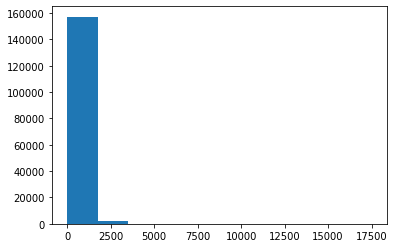

In [ ]:
from matplotlib import pyplot as plt

df_train['lemmatize_comment_length'] = df_train['lemmatize_text'].apply(lambda x: len(str(x)))
plt.figure()
plt.hist(df_train['lemmatize_comment_length'])
plt.show()

In [ ]:
df_train = df_train.fillna('')
df_test = df_test.fillna('')

In [ ]:
df_test

,Unnamed: 0,Unnamed: 0.1,id,comment_text,clean_text,tokenized,stopwords_removed,combined_postag_wnet,lemmatize_word_w_pos,lemmatize_text
0,0,0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you wi...,"['yo', 'bitch', 'ja', 'rule', 'is', 'more', 's...","['yo', 'bitch', 'ja', 'rule', 'succesful', 'ev...","[('yo', 'n'), ('bitch', 'n'), ('ja', 'n'), ('r...","['yo', 'bitch', 'ja', 'rule', 'succesful', 'ev...",yo bitch ja rule succesful ever hating sad mof...
1,1,1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,from rfc the title is fine as it is in my op...,"['from', 'rfc', 'the', 'title', 'is', 'fine', ...","['rfc', 'title', 'fine', 'opinion']","[('rfc', 'n'), ('title', 'n'), ('fine', 'a'), ...","['rfc', 'title', 'fine', 'opinion']",rfc title fine opinion
2,2,2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",sources zawe ashton on lapland,"['sources', 'zawe', 'ashton', 'on', 'lapland']","['sources', 'zawe', 'ashton', 'lapland']","[('sources', 'n'), ('zawe', 'n'), ('ashton', '...","['source', 'zawe', 'ashton', 'lapland']",source zawe ashton lapland
3,3,3,00017563c3f7919a,":If you have a look back at the source, the in...",if you have a look back at the source the info...,"['if', 'you', 'have', 'a', 'look', 'back', 'at...","['look', 'back', 'source', 'information', 'upd...","[('look', 'v'), ('back', 'r'), ('source', 'n')...","['look', 'back', 'source', 'information', 'upd...",look back source information update correct fo...
4,4,4,00017695ad8997eb,I don't anonymously edit articles at all.,i do not anonymously edit articles at all,"['i', 'do', 'not', 'anonymously', 'edit', 'art...","['anonymously', 'edit', 'articles']","[('anonymously', 'n'), ('edit', 'n'), ('articl...","['anonymously', 'edit', 'article']",anonymously edit article
...,...,...,...,...,...,...,...,...,...,...
153159,153159,153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",i totally agree this stuff is nothing but too...,"['i', 'totally', 'agree', 'this', 'stuff', 'is...","['totally', 'agree', 'stuff', 'nothing', 'tool...","[('totally', 'r'), ('agree', 'v'), ('stuff', '...","['totally', 'agree', 'stuff', 'nothing', 'tool...",totally agree stuff nothing toolongcrap
153160,153160,153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,throw from out field to home plate does it g...,"['throw', 'from', 'out', 'field', 'to', 'home'...","['throw', 'field', 'home', 'plate', 'get', 'fa...","[('throw', 'v'), ('field', 'n'), ('home', 'n')...","['throw', 'field', 'home', 'plate', 'get', 'fa...",throw field home plate get fast throw cut man ...
153161,153161,153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",okinotorishima categories i see your change...,"['okinotorishima', 'categories', 'i', 'see', '...","['okinotorishima', 'categories', 'see', 'chang...","[('okinotorishima', 'n'), ('categories', 'n'),...","['okinotorishima', 'category', 'see', 'change'...",okinotorishima category see change agree corre...
153162,153162,153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",one of the founding nations of the eu germa...,"['one', 'of', 'the', 'founding', 'nations', 'o...","['one', 'founding', 'nations', 'eu', 'germany'...","[('one', 'n'), ('founding', 'v'), ('nations', ...","['one', 'found', 'nation', 'eu', 'germany', 'l...",one found nation eu germany law return quite s...


In [ ]:
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', norm='l2', max_features=10000) # ngram_range=(1,2)
X_train_vectorized = vectorizer.fit_transform(df_train['lemmatize_text'])
X_test_vectorized = vectorizer.transform(df_test['lemmatize_text'])

In [ ]:
type(X_train_vectorized)
X_train_vectorized.todense().shape

In [ ]:
X_test_vectorized

<153164x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2908849 stored elements in Compressed Sparse Row format>

In [ ]:
# predict_proba for roc_auc_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
logreg = LogisticRegression(C=12.0, max_iter=300)

# create submission file
submission_binary = pd.read_csv('/content/drive/My Drive/CS3244 Project/sample_submission.csv')

columns = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', norm='l2', max_features=5000) # ngram_range=(1,2)
X_train_vectorized = vectorizer.fit_transform(df_train['lemmatize_text'])
X_test_vectorized = vectorizer.transform(df_test['lemmatize_text'])

for label in columns:
    print('... Processing {}'.format(label))
    y = df_train[label]
    # train the model using X_dtm & y
    logreg.fit(X_train_vectorized, y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_train_vectorized)
    y_pred_proba_X = logreg.predict_proba(X_train_vectorized) [:,1]
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    print('Training f1_score is {}'.format(f1_score(y, y_pred_X)))
    print('Training roc_auc_score is {}'.format(roc_auc_score(y, y_pred_proba_X)))

    # compute the predicted probabilities for X_test_dtm
    test_y_prob = logreg.predict_proba(X_test_vectorized)[:,1]
    submission_binary[label] = test_y_prob

... Processing obscene
Training accuracy is 0.9818576057052973
Training f1_score is 0.8119274995127654
Training roc_auc_score is 0.9888227160378774
... Processing insult
Training accuracy is 0.9758226745461268
Training f1_score is 0.7236785560807907
Training roc_auc_score is 0.984102166171212
... Processing toxic
Training accuracy is 0.9637026778048643
Training f1_score is 0.789105738421206
Training roc_auc_score is 0.9777146595538143
... Processing severe_toxic
Training accuracy is 0.9920348935583533
Training f1_score is 0.4922093487814623
Training roc_auc_score is 0.9934567875315532
... Processing identity_hate
Training accuracy is 0.994052804080942
Training f1_score is 0.5620673742501153
Training roc_auc_score is 0.992883169774825
... Processing threat
Training accuracy is 0.9979946230831417
Training f1_score is 0.553072625698324
Training roc_auc_score is 0.9984694749869599


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
logreg = LogisticRegression(C=12.0, max_iter=300)

# create submission file
submission_binary = pd.read_csv('/content/drive/My Drive/CS3244 Project/sample_submission.csv')

columns = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

X = df_train['lemmatize_text']
y = df_train[columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', norm='l2', max_features=5000) # ngram_range=(1,2)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

for label in columns:
    print('... Processing {}'.format(label))
    y_train_label = y_train[label]
    y_test_label = y_test[label]
    # train the model using X_dtm & y
    logreg.fit(X_train_vectorized, y_train_label)
    # compute the training accuracy
    y_test_pred_X = logreg.predict(X_test_vectorized)
    y_test_pred_proba_X = logreg.predict_proba(X_test_vectorized) [:,1]
    print('Test accuracy is {}'.format(accuracy_score(y_test_label, y_test_pred_X)))
    print('Test f1_score is {}'.format(f1_score(y_test_label, y_test_pred_X)))
    print('Test roc_auc_score is {}'.format(roc_auc_score(y_test_label, y_test_pred_proba_X)))

    # compute the predicted probabilities for X_test_dtm

... Processing obscene
Test accuracy is 0.9780038435828877
Test f1_score is 0.7686222808174028
Test roc_auc_score is 0.9708640493380037
... Processing insult
Test accuracy is 0.9707344585561497
Test f1_score is 0.6577082824334228
Test roc_auc_score is 0.9640924159751705
... Processing toxic
Test accuracy is 0.9587650401069518
Test f1_score is 0.7567767373090193
Test roc_auc_score is 0.9607971672698011
... Processing severe_toxic
Test accuracy is 0.9902865975935828
Test f1_score is 0.3478260869565218
Test roc_auc_score is 0.976027907606855
... Processing identity_hate
Test accuracy is 0.9923963903743316
Test f1_score is 0.42767295597484273
Test roc_auc_score is 0.9638256667477881
... Processing threat
Test accuracy is 0.9971799799465241
Test f1_score is 0.33497536945812806
Test roc_auc_score is 0.9751574751136067


In [ ]:
logreg.predict_proba(X_train_vectorized)[:,1]

array([3.43729323e-05, 1.16832790e-04, 1.03053792e-04, ...,
       5.80949670e-05, 8.08299300e-05, 1.96999781e-03])

In [ ]:
submission_binary

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999664,0.196321,0.999294,0.163336,0.970496,0.239690
1,0000247867823ef7,0.001448,0.000560,0.000378,0.000283,0.002833,0.000757
2,00013b17ad220c46,0.005990,0.000249,0.001976,0.000008,0.001816,0.000089
3,00017563c3f7919a,0.001782,0.001891,0.001778,0.000128,0.002619,0.000091
4,00017695ad8997eb,0.012462,0.000262,0.001410,0.000348,0.002985,0.000386
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.033246,0.000117,0.002090,0.000333,0.012084,0.000247
153160,fffd7a9a6eb32c16,0.038302,0.002041,0.006383,0.008475,0.017371,0.033007
153161,fffda9e8d6fafa9e,0.000974,0.000127,0.005805,0.000212,0.001298,0.000321
153162,fffe8f1340a79fc2,0.008781,0.000976,0.021825,0.007176,0.007857,0.022365


In [ ]:
submission_binary.to_csv('submission_binary_relevance_improved.csv',index=False)

### Classifier Chains

In [ ]:
from scipy.sparse import csr_matrix, hstack

def add_feature(X, feature_to_add):
    '''
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    '''
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [ ]:
submission_chain_classifiers = pd.read_csv('/content/drive/My Drive/CS3244 Project/sample_submission.csv')

In [ ]:
columns = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
logreg = LogisticRegression(C=12.0)

for label in columns:
    print('... Processing {}'.format(label))
    y = df_train[label]
    # train the model using X_test_vectorized & y
    logreg.fit(X_train_vectorized,y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_train_vectorized)
    print('Training Accuracy is {}'.format(accuracy_score(y,y_pred_X)))
    print('Training f1_score is {}'.format(f1_score(y,y_pred_X)))
    print('Training Roc_auc_score is {}'.format(roc_auc_score(y,y_pred_X)))

    # make predictions from df_test
    test_y = logreg.predict(X_test_vectorized)
    test_y_prob = logreg.predict_proba(X_test_vectorized)[:,1]
    submission_chain_classifiers[label] = test_y_prob
    # chain current label to X_train_vectorized
    X_train_vectorized = add_feature(X_train_vectorized, y_pred_X)
    print('Shape of X_train_vectorized is now {}'.format(X_train_vectorized.shape))
    # chain current label predictions to X_test_vectorized
    X_test_vectorized = add_feature(X_test_vectorized, test_y)
    print('Shape of X_test_vectorized is now {}'.format(X_test_vectorized.shape))

... Processing obscene


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy is 0.9818200048881063
Training f1_score is 0.8115866727284535
Training Roc_auc_score is 0.8674318895780013
Shape of X_train_vectorized is now (159571, 5001)
Shape of X_test_vectorized is now (153164, 5001)
... Processing insult


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy is 0.9761360146893859
Training f1_score is 0.7296990346394094
Training Roc_auc_score is 0.822736212024254
Shape of X_train_vectorized is now (159571, 5002)
Shape of X_test_vectorized is now (153164, 5002)
... Processing toxic


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy is 0.9634833397045829
Training f1_score is 0.7879934509732582
Training Roc_auc_score is 0.8493076362354165
Shape of X_train_vectorized is now (159571, 5003)
Shape of X_test_vectorized is now (153164, 5003)
... Processing severe_toxic


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy is 0.9927179750706582
Training f1_score is 0.5351999999999999
Training Roc_auc_score is 0.7089709194349271
Shape of X_train_vectorized is now (159571, 5004)
Shape of X_test_vectorized is now (153164, 5004)
... Processing identity_hate


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy is 0.994466413070044
Training f1_score is 0.6027890238416556
Training Roc_auc_score is 0.7379663008228258
Shape of X_train_vectorized is now (159571, 5005)
Shape of X_test_vectorized is now (153164, 5005)
... Processing threat


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy is 0.998076091520389
Training f1_score is 0.577716643741403
Training Roc_auc_score is 0.7195427021488733
Shape of X_train_vectorized is now (159571, 5006)
Shape of X_test_vectorized is now (153164, 5006)


In [ ]:
submission_chain_classifiers.to_csv('submission_chain_classifiers.csv', index=False)

### skmultilearn

In [ ]:
!pip install scikit-multilearn

In [ ]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
columns = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
logreg = LogisticRegression(C=12.0)

vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', norm='l2', max_features=5000) # ngram_range=(1,2)
X_train_vectorized = vectorizer.fit_transform(df_train['lemmatize_text'])
X_test_vectorized = vectorizer.transform(df_test['lemmatize_text'])

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(LogisticRegression(C=12.0, max_iter=300))

y_train = df_train[columns]

# train
classifier.fit(X_train_vectorized, y_train)

# predict
predictions = classifier.predict(X_train_vectorized)

# accuracy
print("Training Accuracy = ",accuracy_score(y_train,predictions))
# print("Training F1_score = ",f1_score(y_train,predictions))
# print("Training Roc_auc_score = ",roc_auc_score(y_train,predictions))
# print("\n")

In [ ]:
submission_df = pd.DataFrame.sparse.from_spmatrix(classifier.predict_proba(X_test_vectorized))

In [ ]:
submission_binary_multilearn = pd.read_csv('/content/drive/My Drive/CS3244 Project/sample_submission.csv')
submission_binary_multilearn[columns] = submission_df

In [ ]:
submission_binary_multilearn.to_csv('submission_binaryrelevance_multilearn.csv', index=False)

In [ ]:
submission_df

,0,1,2,3,4,5
0,0.999304,0.971684,0.999637,0.195651,0.244325,0.162436
1,0.000360,0.002950,0.001487,0.000559,0.000757,0.000284
2,0.002007,0.001752,0.005824,0.000240,0.000087,0.000008
3,0.001825,0.002732,0.001768,0.001948,0.000091,0.000129
4,0.001381,0.003202,0.012235,0.000270,0.000390,0.000349
...,...,...,...,...,...,...
153159,0.002037,0.012269,0.033514,0.000116,0.000255,0.000334
153160,0.006314,0.017226,0.034668,0.001989,0.032510,0.008440
153161,0.005997,0.001384,0.000868,0.000124,0.000329,0.000214
153162,0.021722,0.008776,0.008539,0.000995,0.022550,0.007206


In [ ]:
submission_binary_multilearn

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999637,0.195651,0.999304,0.162436,0.971684,0.244325
1,0000247867823ef7,0.001487,0.000559,0.000360,0.000284,0.002950,0.000757
2,00013b17ad220c46,0.005824,0.000240,0.002007,0.000008,0.001752,0.000087
3,00017563c3f7919a,0.001768,0.001948,0.001825,0.000129,0.002732,0.000091
4,00017695ad8997eb,0.012235,0.000270,0.001381,0.000349,0.003202,0.000390
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.033514,0.000116,0.002037,0.000334,0.012269,0.000255
153160,fffd7a9a6eb32c16,0.034668,0.001989,0.006314,0.008440,0.017226,0.032510
153161,fffda9e8d6fafa9e,0.000868,0.000124,0.005997,0.000214,0.001384,0.000329
153162,fffe8f1340a79fc2,0.008539,0.000995,0.021722,0.007206,0.008776,0.022550


In [ ]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

columns = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', norm='l2', max_features=5000) # ngram_range=(1,2)
X_train_vectorized = vectorizer.fit_transform(df_train['lemmatize_text'])
X_test_vectorized = vectorizer.transform(df_test['lemmatize_text'])

classifier = ClassifierChain(LogisticRegression(C=12.0))

y_train = df_train[columns]

# Training logistic regression model on train data
classifier.fit(X_train_vectorized, y_train)

# predict
predictions = classifier.predict(X_train_vectorized)

# accuracy
print("Accuracy = ",accuracy_score(y_train,predictions))
print("\n")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy =  0.9309774332428825




# Word2Vec Gensim

In [ ]:
df_train = df_train.fillna("")
df_test = df_test.fillna("")

train_comments = df_train['lemmatize_text']
test_comments = df_test['lemmatize_text']

vocab_train = []
vocab_test = []
#print (len(train_comments))
#print (len(test_comments))
for sentences in train_comments:
  vocab_train.append(sentences.split())
for sentences in test_comments:
  vocab_test.append(sentences.split())

In [ ]:
vocab = vocab_train + vocab_test

In [ ]:
from gensim.models import word2vec
import gensim
import json

In [ ]:
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

#### The word2vec algorithms include skip-gram and CBOW models, using either hierarchical softmax or negative sampling

In [ ]:
w2v = word2vec.Word2Vec(vocab, workers=num_workers, size=num_features, min_count = min_word_count, window = context, sample = downsampling)
w2v.init_sims(replace=True)


In [ ]:
def makeFeatureVec(words, model, num_features):
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((num_features,), dtype="float32")
    #
    nwords = 0
    # 
    # Index2word is a list that contains the names of the words in 
    # the model's vocabulary. Convert it to a set, for speed 
    index2word_set = set(model.wv.index2word)
    #
    # Loop over each word in the review and, if it is in the model's
    # vocaublary, add its feature vector to the total
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1
            featureVec = np.add(featureVec, model[word])
    # Divide the result by the number of words to get the average
    if nwords == 0:
        nwords = 1
    featureVec = np.divide(featureVec, nwords)
    return featureVec



def getAvgFeatureVecs(reviews, model, num_features):
    # Given a set of reviews (each one a list of words), calculate 
    # the average feature vector for each one and return a 2D numpy array 
    # Preallocate a 2D numpy array, for speed
    reviewFeatureVecs = np.zeros((len(reviews), num_features), dtype="float32")
    counter = 0
    # Loop through the reviews
    for review in reviews:
        # Call the function (defined above) that makes average feature vectors
        reviewFeatureVecs[counter] = makeFeatureVec(review, model, num_features)
        counter = counter + 1
    return reviewFeatureVecs

In [ ]:
X = getAvgFeatureVecs(df_train["lemmatize_text"], w2v, 300)
x_test = getAvgFeatureVecs(df_test["lemmatize_text"], w2v, 300)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


In [ ]:
len(X[0])

300

In [ ]:
time()

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 5.48 µs


()

In [ ]:
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc, accuracy_score
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict,train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
import time

target_col = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
y = df_train[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

prd = np.zeros((x_test.shape[0],y.shape[1]))

start = time.time()
for i,col in enumerate(target_col):
    lr = LogisticRegression(C=2,random_state = i,class_weight = 'balanced', max_iter=300)
    print('Building {} model for column:{''}'.format(i,col))
    lr.fit(X,y[col])
    print(accuracy_score(y[col], lr.predict(X)))
    prd[:,i] = lr.predict_proba(x_test)[:,1]
end = time.time()

print("total time: ", start - end)

Building 0 model for column:toxic
0.7533135720149651
Building 1 model for column:severe_toxic
0.8874294201327309
Building 2 model for column:obscene
0.8174104317200493
Building 3 model for column:threat
0.7921301489619041
Building 4 model for column:insult
0.800308326700967
Building 5 model for column:identity_hate
0.8184319205870741
total time:  -56.259424924850464


In [ ]:
for col in target_col:
    print("Column:",col)
    pred = lr.predict(X)
    print('\nConfusion matrix\n',confusion_matrix(y[col],pred))

Column: toxic

Confusion matrix
 [[122190  22087]
 [  7827   7467]]
Column: severe_toxic

Confusion matrix
 [[129754  28222]
 [   263   1332]]
Column: obscene

Confusion matrix
 [[126742  24380]
 [  3275   5174]]
Column: threat

Confusion matrix
 [[129827  29266]
 [   190    288]]
Column: insult

Confusion matrix
 [[126770  24924]
 [  3247   4630]]
Column: identity_hate

Confusion matrix
 [[129605  28561]
 [   412    993]]


In [ ]:
prd_1 = pd.DataFrame(prd,columns=y.columns)
# submit = pd.concat([test['id'],prd_1],axis=1)
# submit.to_csv(r"C:\Users\Admin\Desktop\Y2S1\CS3244\submission_w2v_7.csv",index=False)
# submit.head()

In [ ]:
sample_submission = pd.read_csv('/content/drive/My Drive/CS3244 Project/sample_submission.csv')
sample_submission

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


In [ ]:
sample_submission[target_col] = prd_1
sample_submission.to_csv('gensim_word2vec.csv', index=False)